In [1]:
import pandas as pd
weather = pd.read_csv("DailyDelhiClimateTest.csv", index_col="date", parse_dates=["date"])

In [2]:
weather.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [3]:
weather['year'] = weather.index.year
weather['month'] = weather.index.month

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
weather[['meantemp', 'humidity', 'wind_speed', 'meanpressure']] = scaler.fit_transform(
    weather[['meantemp', 'humidity', 'wind_speed', 'meanpressure']]
)

In [5]:
weather.dtypes

meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
year              int32
month             int32
dtype: object

In [6]:
weather.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-04-15', '2017-04-16', '2017-04-17', '2017-04-18',
               '2017-04-19', '2017-04-20', '2017-04-21', '2017-04-22',
               '2017-04-23', '2017-04-24'],
              dtype='datetime64[ns]', name='date', length=114, freq=None)

In [7]:
weather.index .year.value_counts().sort_index()

date
2017    114
Name: count, dtype: int64

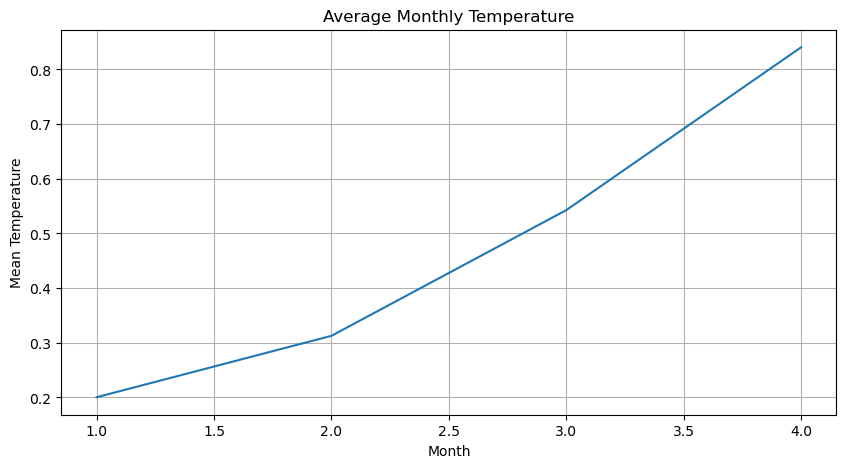

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
monthly_avg=weather.groupby('month')['meantemp'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_avg.index,y=monthly_avg.values)
plt.title("Average Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Mean Temperature")
plt.grid(True)
plt.show()

In [9]:
weather.describe()

,meantemp,humidity,wind_speed,meanpressure,year,month
count,114.000000,114.000000,114.000000,114.000000,114.0,114.000000
mean,0.455876,0.493170,0.376890,0.980521,2017.0,2.421053
std,0.270641,0.244202,0.200150,0.092834,0.0,1.104254
min,0.000000,0.000000,0.000000,0.000000,2017.0,1.000000
25%,0.231370,0.280149,0.232950,0.984051,2017.0,1.000000
50%,0.377660,0.512273,0.372735,0.989552,2017.0,2.000000
75%,0.710866,0.693525,0.484261,0.993702,2017.0,3.000000
max,1.000000,1.000000,1.000000,1.000000,2017.0,4.000000


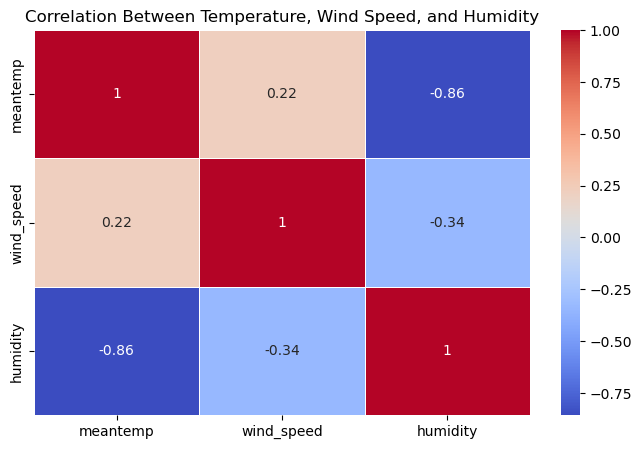

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_features = ['meantemp', 'wind_speed', 'humidity']
correlation_matrix = weather[corr_features].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Temperature, Wind Speed, and Humidity")
plt.show()

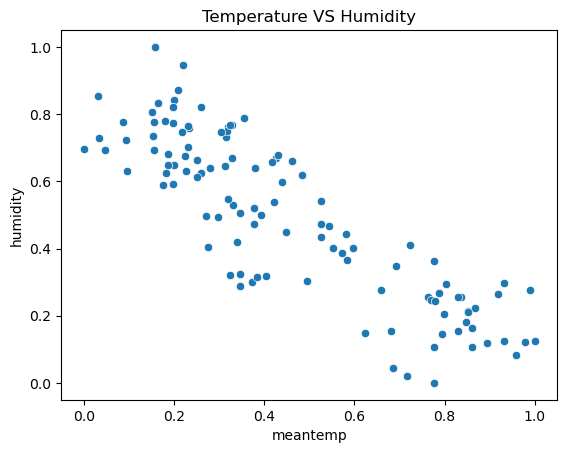

In [11]:
sns.scatterplot(x='meantemp',y='humidity',data=weather)
plt.title("Temperature VS Humidity")
plt.show()

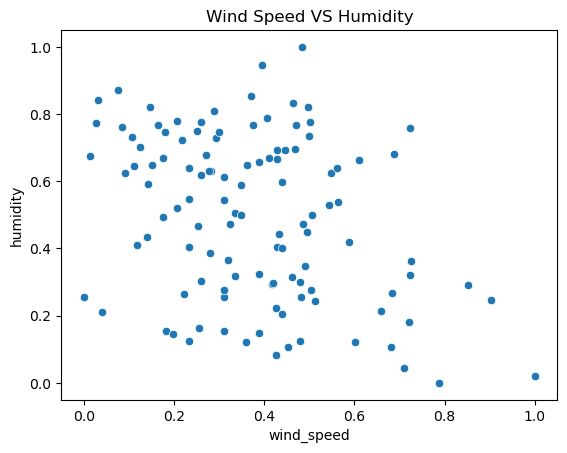

In [12]:
sns.scatterplot(x='wind_speed',y='humidity',data=weather)
plt.title("Wind Speed VS Humidity")
plt.show()

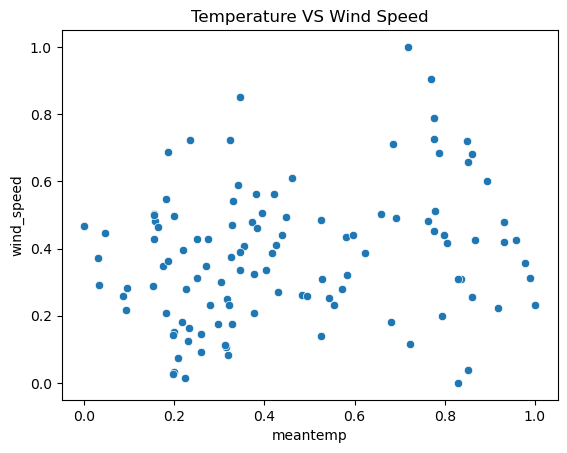

In [13]:
sns.scatterplot(x='meantemp',y='wind_speed',data=weather)
plt.title("Temperature VS Wind Speed")
plt.show()


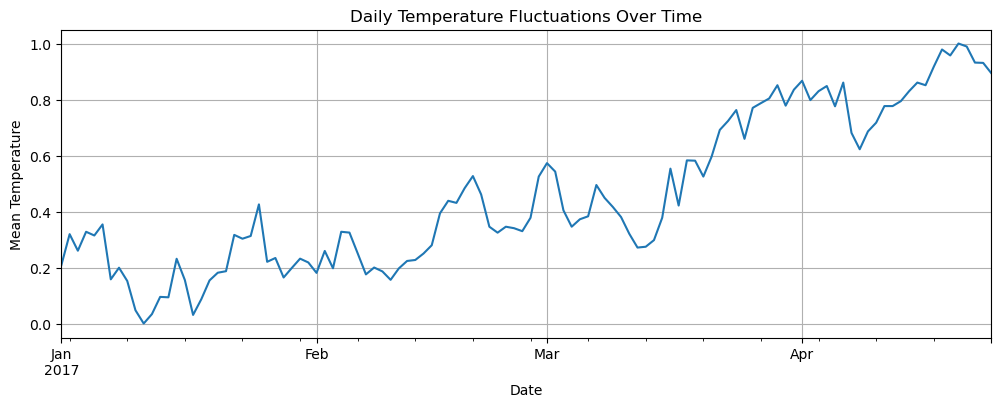

In [14]:
plt.figure(figsize=(12, 4))
weather['meantemp'].plot()
plt.title("Daily Temperature Fluctuations Over Time")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.grid(True)
plt.show()

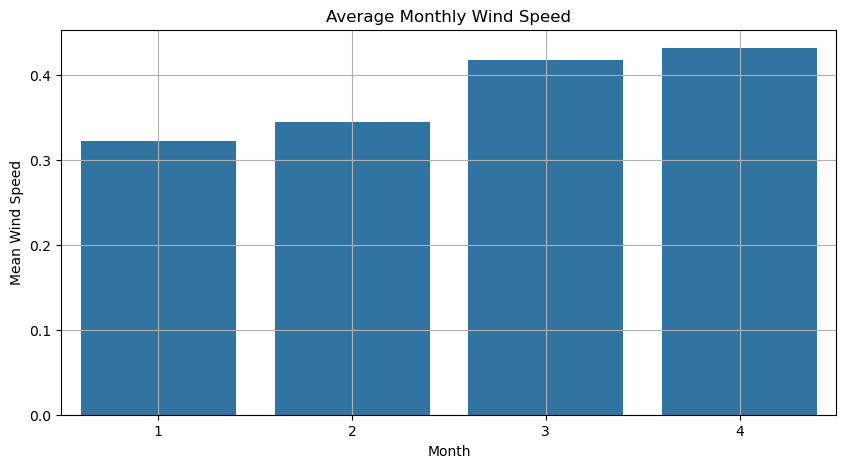

In [15]:
monthly_wind = weather.groupby('month')['wind_speed'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_wind.index, y=monthly_wind.values)
plt.title("Average Monthly Wind Speed")
plt.xlabel("Month")
plt.ylabel("Mean Wind Speed")
plt.grid(True)
plt.show()

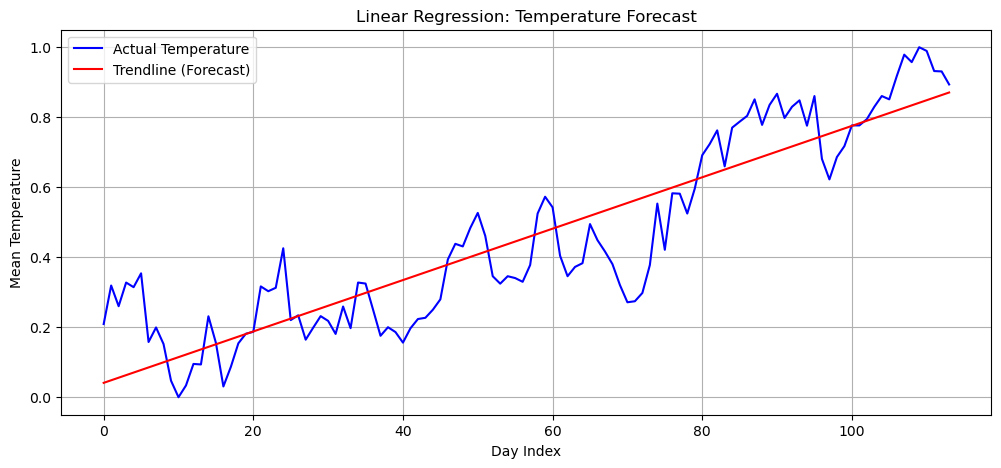

In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np
weather['day_index'] = np.arange(len(weather))
X = weather[['day_index']]
y = weather['meantemp']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.figure(figsize=(12, 5))
plt.plot(weather['day_index'], y, label="Actual Temperature", color='blue')
plt.plot(weather['day_index'], y_pred, label="Trendline (Forecast)", color='red')
plt.title("Linear Regression: Temperature Forecast")
plt.xlabel("Day Index")
plt.ylabel("Mean Temperature")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.12
